In [5]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from keras.datasets import mnist


from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
import plotly.tools as tls
from sklearn.preprocessing import LabelBinarizer

# Pytorch

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)
# train = torch.utils.data.TensorDataset(torch_X_train,torch_X_train)
# test = torch.utils.data.TensorDataset(torch_X_test,torch_X_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [7]:
torch_X_train.dtype

torch.float32

In [8]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,32)
        self.fc4 = nn.Linear(32,3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return x

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(3,32)
        self.fc2 = nn.Linear(32,128)
        self.fc3 = nn.Linear(128,512)
        self.fc4 = nn.Linear(512,784)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return x

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.enc = Encoder()
        self.dec = Decoder()

    def forward(self, x):
        return self.dec(self.enc(x))

In [27]:
autoencoder = AutoEncoder()

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0001)

In [28]:
# torch.set_default_tensor_type('torch.LongTensor')

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm_notebook(enumerate(train_loader)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, _ = data
        inputs = inputs.reshape(-1,28*28)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 68.818
[1,    40] loss: 65.630
[1,    60] loss: 53.947
[1,    80] loss: 52.180
[1,   100] loss: 49.721
[1,   120] loss: 50.007
[1,   140] loss: 49.170
[1,   160] loss: 53.596
[1,   180] loss: 53.220
[1,   200] loss: 52.969
[1,   220] loss: 48.277
[1,   240] loss: 45.342
[1,   260] loss: 51.557
[1,   280] loss: 53.006
[1,   300] loss: 49.498
[1,   320] loss: 51.302
[1,   340] loss: 52.644
[1,   360] loss: 50.877
[1,   380] loss: 49.886
[1,   400] loss: 52.526
[1,   420] loss: 52.825
[1,   440] loss: 50.675
[1,   460] loss: 52.305
[1,   480] loss: 47.722
[1,   500] loss: 46.734
[1,   520] loss: 47.363
[1,   540] loss: 45.942
[1,   560] loss: 43.679
[1,   580] loss: 43.422
[1,   600] loss: 43.568
[1,   620] loss: 47.326
[1,   640] loss: 47.013
[1,   660] loss: 44.746
[1,   680] loss: 43.636
[1,   700] loss: 45.841
[1,   720] loss: 46.558
[1,   740] loss: 44.324
[1,   760] loss: 42.502
[1,   780] loss: 41.998
[1,   800] loss: 42.290
[1,   820] loss: 38.708
[1,   840] loss:

[2,    20] loss: 32.452
[2,    40] loss: 33.599
[2,    60] loss: 33.386
[2,    80] loss: 33.737
[2,   100] loss: 33.408
[2,   120] loss: 32.983
[2,   140] loss: 32.835
[2,   160] loss: 35.247
[2,   180] loss: 34.184
[2,   200] loss: 33.649
[2,   220] loss: 31.572
[2,   240] loss: 31.046
[2,   260] loss: 34.229
[2,   280] loss: 34.308
[2,   300] loss: 32.881
[2,   320] loss: 33.713
[2,   340] loss: 33.878
[2,   360] loss: 32.546
[2,   380] loss: 31.948
[2,   400] loss: 35.400
[2,   420] loss: 34.948
[2,   440] loss: 33.949
[2,   460] loss: 35.903
[2,   480] loss: 32.941
[2,   500] loss: 32.891
[2,   520] loss: 31.983
[2,   540] loss: 33.680
[2,   560] loss: 32.836
[2,   580] loss: 31.620
[2,   600] loss: 32.360
[2,   620] loss: 34.677
[2,   640] loss: 34.640
[2,   660] loss: 33.012
[2,   680] loss: 32.958
[2,   700] loss: 33.584
[2,   720] loss: 34.704
[2,   740] loss: 33.642
[2,   760] loss: 32.858
[2,   780] loss: 32.233
[2,   800] loss: 32.932
[2,   820] loss: 30.795
[2,   840] loss:

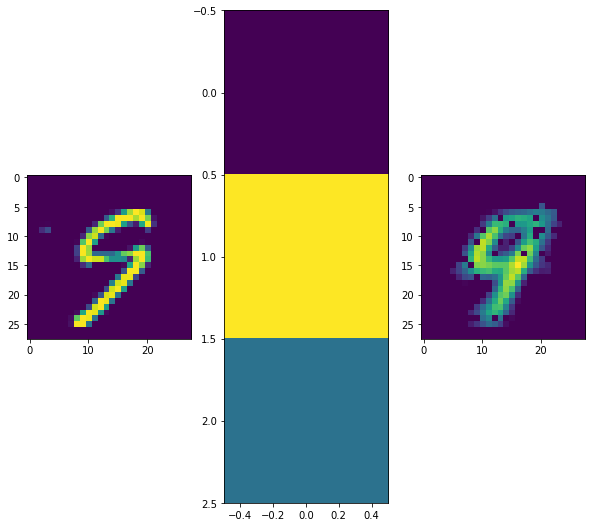

In [31]:
i=1

latent=autoencoder.enc(inputs[i])
output=autoencoder(inputs[i])

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(inputs[i].reshape(28,28))
ax[1].imshow(latent.detach().numpy().reshape(3,1))
ax[2].imshow(output.detach().numpy().reshape(28,28))

## Latent Space

In [32]:
output = autoencoder.enc(torch_X_train.reshape(-1,28*28))
predicted = output.detach().numpy()

In [34]:
import plotly.graph_objects as go
import numpy as np

colors = plt.cm.winter(np.linspace(0,1,10))
color = 'rgb({0:3.0f}, {1:3.0f}, {2:3.0f})'.format(*colors[0]*255)

fig = go.Figure(data=[go.Scatter3d(x=predicted[y_train==i,0], y=predicted[y_train==i,1], z=predicted[y_train==i,2], 
                                   marker=dict(size=4, opacity=0.1),
                                   mode='markers', name =f'{i}') for i in range(10)])

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.update_layout(showlegend=True)
fig.show()